In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import ttest_ind

# Load the dataset
df = pd.read_csv('Spotify Data.csv')

# Display the first few rows and summary information
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
df.info()

# --- Data Cleaning ---
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Remove duplicate tracks, if any
df.drop_duplicates(subset=['track_id'], inplace=True)
print(f"\nShape of the dataset after removing duplicates: {df.shape}")

First 5 rows of the dataset:
   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373 

C:\Users\david_3ucmbk5\AppData\Local\Temp\ipykernel_9440\2526726729.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_features['energy'], y=genre_features.index, palette='viridis')


Bar chart 'energy_by_genre.png' saved.


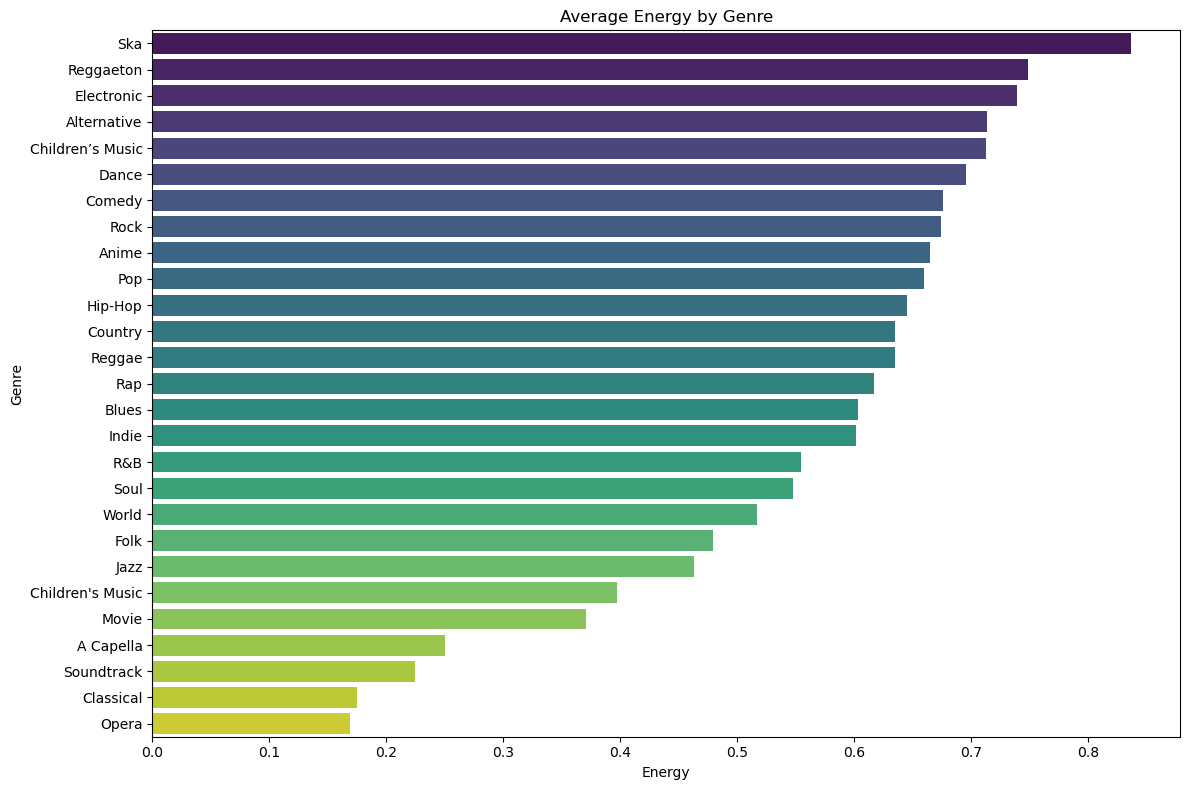

In [3]:
# Analyze trends across genres
# Group by genre and calculate the mean of audio features
genre_features = df.groupby('genre')[['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'loudness']].mean().sort_values(by='energy', ascending=False)

# Plotting the average energy by genre (as an example)
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_features['energy'], y=genre_features.index, palette='viridis')
plt.title('Average Energy by Genre')
plt.xlabel('Energy')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('energy_by_genre.png')
print("Bar chart 'energy_by_genre.png' saved.")

Histogram plot 'feature_distributions.png' saved.
Box plot 'feature_boxplots.png' saved.


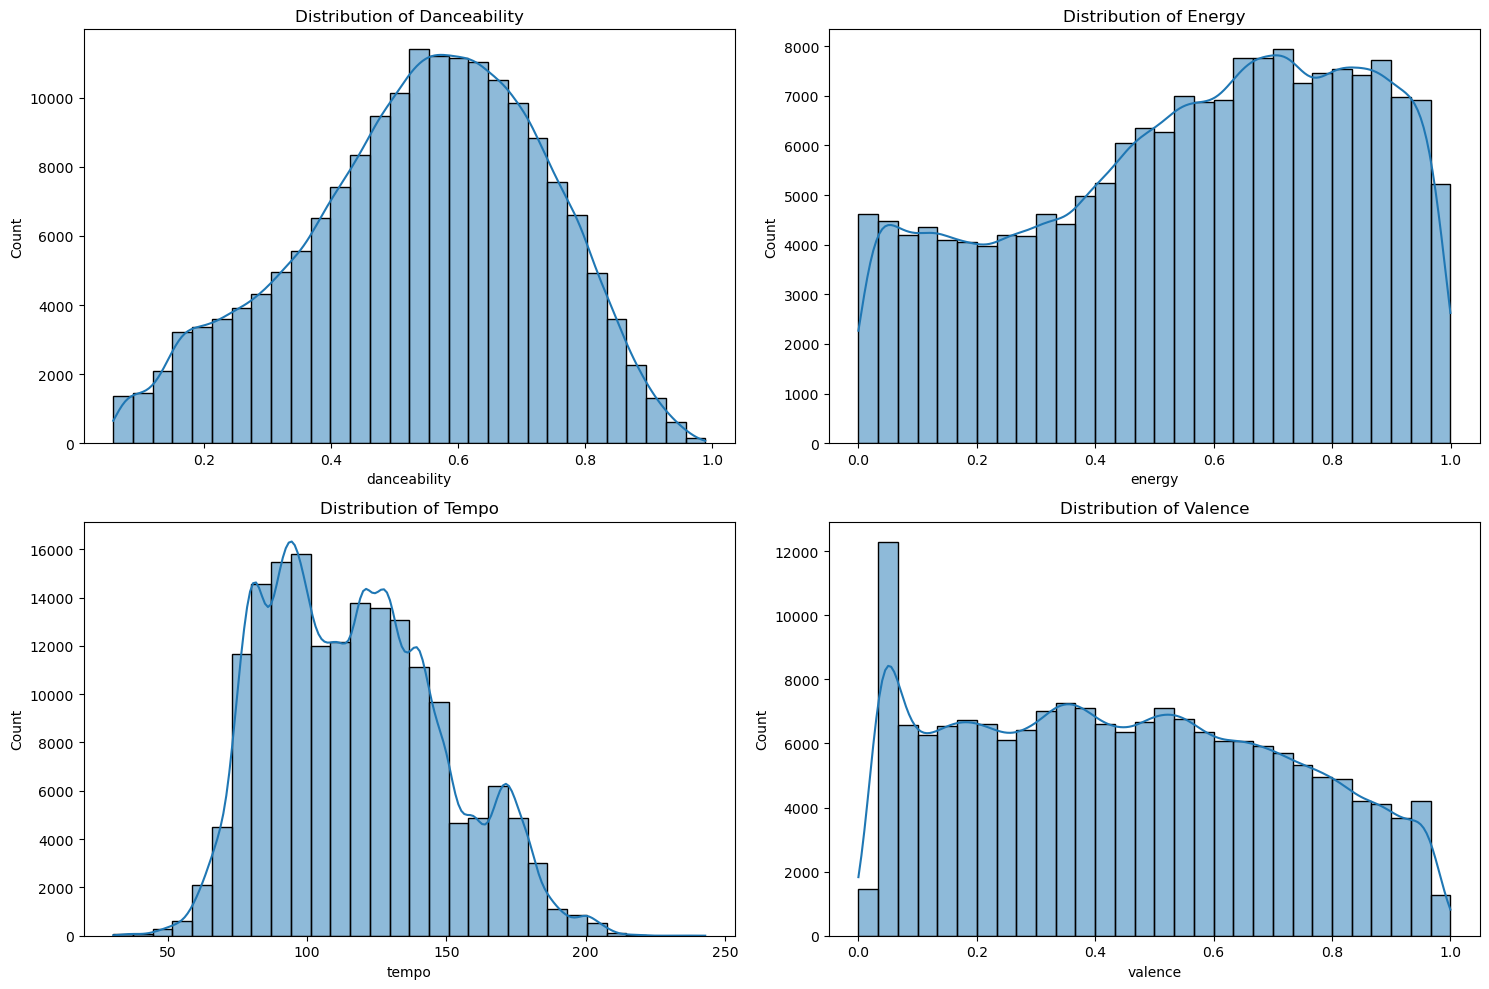

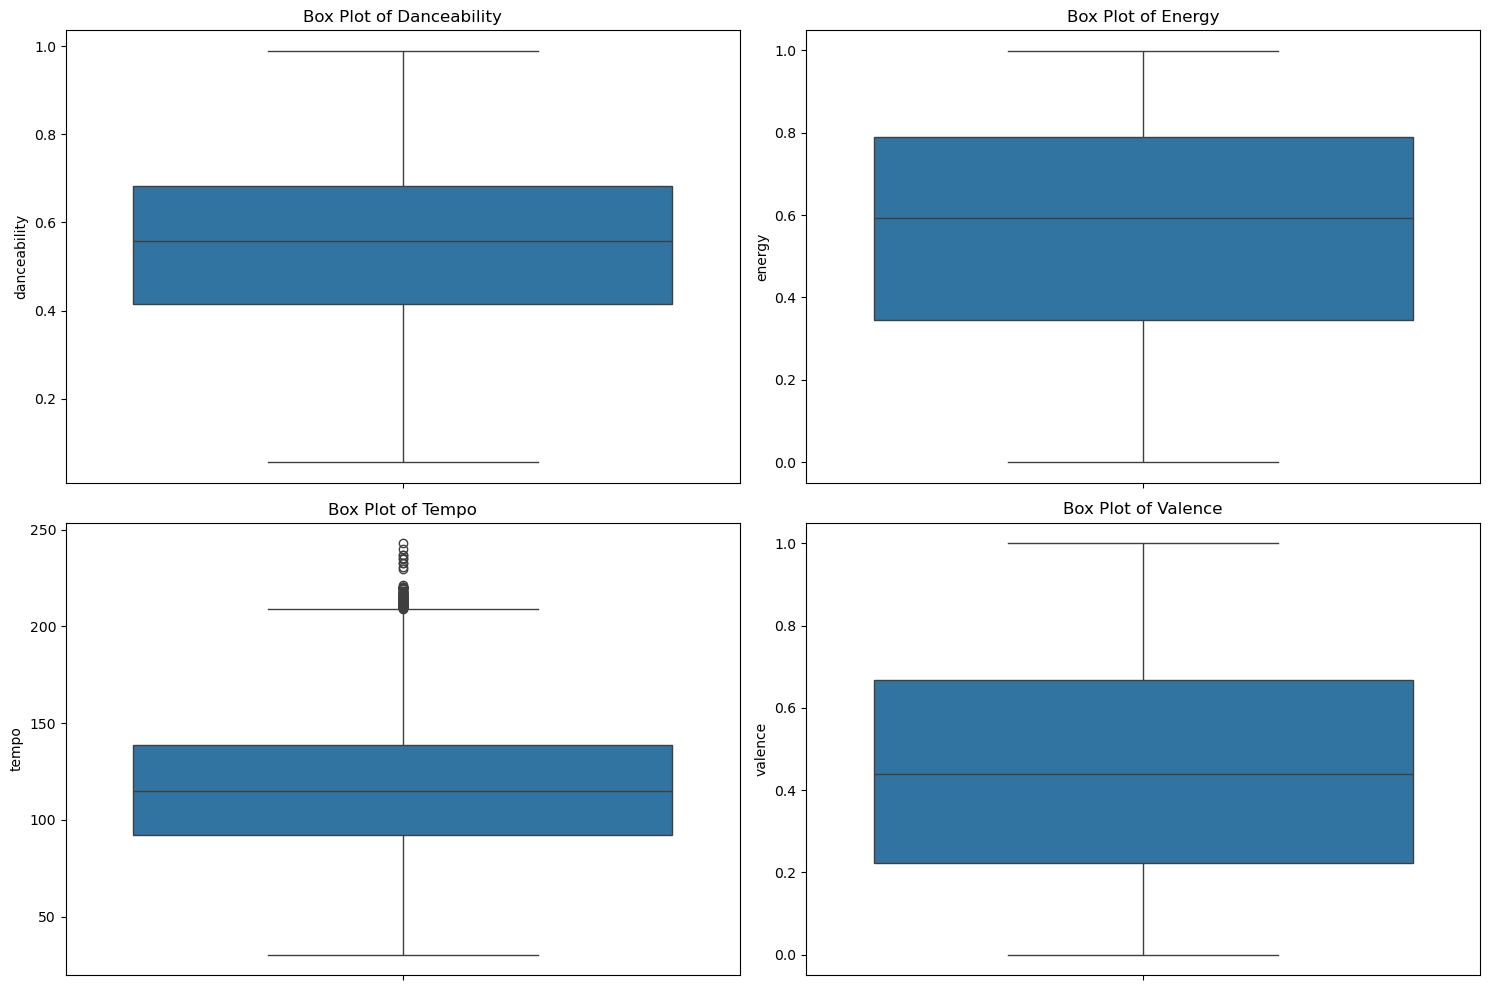

In [5]:
# Visualize distributions of key features
features = ['danceability', 'energy', 'tempo', 'valence']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
plt.tight_layout()
plt.savefig('feature_distributions.png')
print("Histogram plot 'feature_distributions.png' saved.")

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature.capitalize()}')
plt.tight_layout()
plt.savefig('feature_boxplots.png')
print("Box plot 'feature_boxplots.png' saved.")

These visualizations show us the shape of our data. For example, we can see that the distribution of danceability is fairly normal (bell-shaped), while energy is skewed towards higher values.

Correlation heatmap 'correlation_heatmap.png' saved.


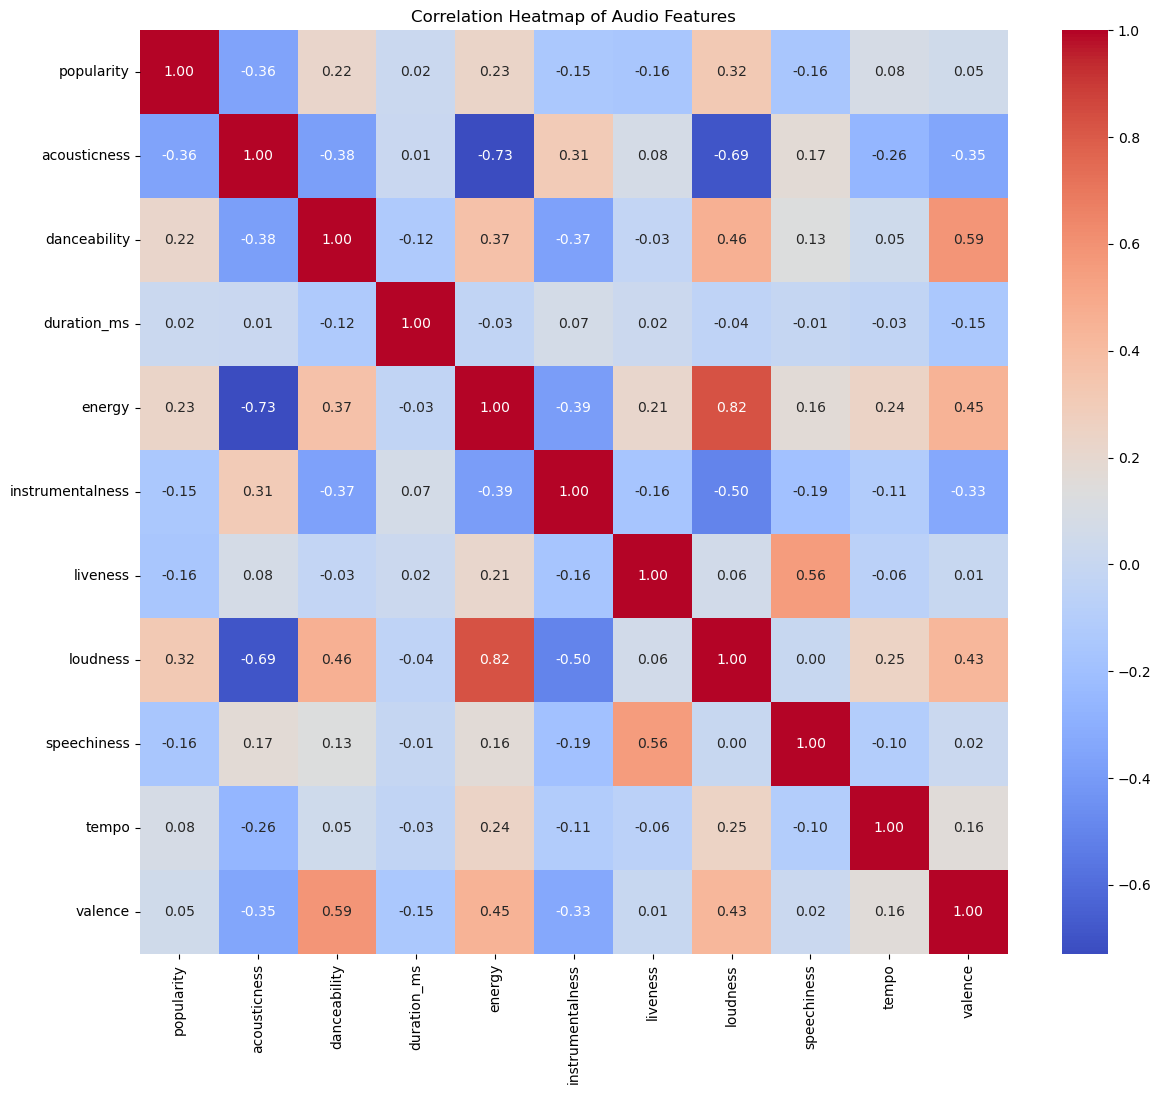

In [6]:
# Explore correlations between numeric features
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Audio Features')
plt.savefig('correlation_heatmap.png')
print("Correlation heatmap 'correlation_heatmap.png' saved.")

Energy and Loudness have a strong positive correlation, which makes sense – louder songs often feel more energetic.

Acousticness and Energy have a strong negative correlation, suggesting that acoustic songs tend to be less energetic.

Danceability and Valence (positivity) also show a positive correlation.

In [11]:
# Statistical testing: Popular vs. Unpopular songs
# Define popular and unpopular based on popularity quantiles
popular_threshold = df['popularity'].quantile(0.75)
unpopular_threshold = df['popularity'].quantile(0.25)

popular_songs = df[df['popularity'] >= popular_threshold]
unpopular_songs = df[df['popularity'] <= unpopular_threshold]

# Perform t-tests for a few key features
features_to_test = ['danceability', 'energy', 'valence']
print("T-test results (Popular vs. Unpopular songs):\n")

for feature in features_to_test:
    stat, p_value = ttest_ind(popular_songs[feature], unpopular_songs[feature], equal_var=False)
    print(f'Feature: {feature}')
    print(f'T-statistic: {stat:.2f}, P-value: {p_value:.3f}')
    if p_value < 0.05:
        print("The difference is statistically significant.\n")
    else:
        print("The difference is not statistically significant.\n")

T-test results (Popular vs. Unpopular songs):

Feature: danceability
T-statistic: 96.22, P-value: 0.000
The difference is statistically significant.

Feature: energy
T-statistic: 82.69, P-value: 0.000
The difference is statistically significant.

Feature: valence
T-statistic: 20.33, P-value: 0.000
The difference is statistically significant.



In [13]:
# Define the target variable: is_popular
df['is_popular'] = (df['popularity'] > 70).astype(int)

# Count the number of popular songs
print("Distribution of the target variable 'is_popular':")
print(df['is_popular'].value_counts())

Distribution of the target variable 'is_popular':
is_popular
0    173514
1      3260
Name: count, dtype: int64


In [15]:
# Select features
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = df[features]
y = df['is_popular']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Train a Random Forest model
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)

In [16]:
# Evaluate the Logistic Regression model
print("--- Logistic Regression Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Evaluate the Random Forest model
print("\n--- Random Forest Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rand_forest):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rand_forest))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rand_forest))

--- Logistic Regression Model Evaluation ---
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     34703
           1       0.00      0.00      0.00       652

    accuracy                           0.98     35355
   macro avg       0.49      0.50      0.50     35355
weighted avg       0.96      0.98      0.97     35355

Confusion Matrix:
[[34703     0]
 [  652     0]]

--- Random Forest Model Evaluation ---
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     34703
           1       0.14      0.00      0.00       652

    accuracy                           0.98     35355
   macro avg       0.56      0.50      0.50     35355
weighted avg       0.97      0.98      0.97     35355

Confusion Matrix:
[[34697     6]
 [  651     1]]


C:\Users\david_3ucmbk5\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\david_3ucmbk5\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\david_3ucmbk5\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
